In [2]:
import pandas as pd
import seaborn as sns
% matplotlib inline
import matplotlib.pyplot as plt

## 划分

In [3]:
#导入总数据
% time allrawdata = pd.read_csv('gy_contest_link_traveltime_training_data.txt',nrows=10000000,sep=';') # 车流量数据

Wall time: 5.93 s


### 按照每个id划分

In [4]:
link_info = pd.read_csv('gy_contest_link_info.txt',sep=';') # 路段id,length,width,link_class,数据

In [5]:
link_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
link_ID       132 non-null uint64
length        132 non-null int64
width         132 non-null int64
link_class    132 non-null int64
dtypes: int64(3), uint64(1)
memory usage: 4.2 KB


In [6]:
link_info['link_ID'].iloc[0]

4377906289869500514

In [234]:
ID_4377906289869500514 = allrawdata.query("link_ID=='4377906289869500514'").copy()
ID_4377906289869500514.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48315 entries, 94 to 7661798
Data columns (total 4 columns):
link_ID          48315 non-null uint64
date             48315 non-null object
time_interval    48315 non-null object
travel_time      48315 non-null float64
dtypes: float64(1), object(2), uint64(1)
memory usage: 1.8+ MB


### 处理datetime列

In [235]:
% time ID_4377906289869500514[['t0','t1']]=ID_4377906289869500514['time_interval'].str.replace('[','').str.replace(')','').str.split(',',expand=True)

Wall time: 110 ms


In [236]:
# % time ID_4377906289869500514[['t0','t1']]=pd.to_datetime(ID_4377906289869500514[['t0','t1']])
% time ID_4377906289869500514['t0']=pd.to_datetime(ID_4377906289869500514['t0'])
% time ID_4377906289869500514['t1']=pd.to_datetime(ID_4377906289869500514['t1'])

Wall time: 14.5 ms
Wall time: 15 ms


In [237]:
ID_4377906289869500514['hour']=ID_4377906289869500514['t0'].apply(lambda x: x.hour)
ID_4377906289869500514['minute']=ID_4377906289869500514['t0'].apply(lambda x: x.minute)

In [238]:
ID_4377906289869500514['minuteofday']=ID_4377906289869500514['hour']*60+ID_4377906289869500514['minute']

In [239]:
ID_4377906289869500514['day']=ID_4377906289869500514['t0'].apply(lambda x: x.day)
ID_4377906289869500514['month']=ID_4377906289869500514['t0'].apply(lambda x: x.month)

In [240]:
% time ID_4377906289869500514['minuteofmonth']= ID_4377906289869500514['day']*24*60+ID_4377906289869500514['hour']*60+  ID_4377906289869500514['minute']
                                                

Wall time: 6.52 ms


In [241]:
% time ID_4377906289869500514['minuteofyear']=ID_4377906289869500514['month']*31*24*60+ID_4377906289869500514['day']*24*60+ID_4377906289869500514['hour']*60+  ID_4377906289869500514['minute']

Wall time: 5.99 ms


## 处理link_top数据

In [244]:
link_top = pd.read_csv('gy_contest_link_top.txt',sep=';')# 路段拓扑关系数据

In [245]:
link_info = pd.read_csv('gy_contest_link_info.txt',sep=';') # 路段id,length,width,link_class,数据

In [246]:
link_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
link_ID       132 non-null uint64
length        132 non-null int64
width         132 non-null int64
link_class    132 non-null int64
dtypes: int64(3), uint64(1)
memory usage: 4.2 KB


In [247]:
def num_top(x):
    try:
        return len(x)
    except:
        return 0
link_top['in_num']=link_top['in_links'].str.split('#').apply(num_top)
link_top['out_num']=link_top['out_links'].str.split('#').apply(num_top)
link_top[['in0','in1','in2','in3']]=link_top['in_links'].str.split('#',expand=True) 
link_top[['out0','out1','out2','out3']]=link_top['out_links'].str.split('#',expand=True) 

In [248]:
def in_length(x):
    try:
        return link_info.query("link_ID=='%s'" % x)['length'].iloc[0]
    except:
        return 0
def in_width(x):
    try:
        return link_info.query("link_ID=='%s'" % x)['width'].iloc[0]
    except:
        return 0
for i in range(4):
    exec("link_top['in%d_len']=link_top['in%d'].apply(in_length)" % (i,i))
for i in range(4):
    exec("link_top['in%d_wid']=link_top['in%d'].apply(in_width)" % (i,i))
for i in range(4):
    exec("link_top['out%d_len']=link_top['out%d'].apply(in_length)" % (i,i))
for i in range(4):
    exec("link_top['out%d_wid']=link_top['out%d'].apply(in_width)" % (i,i))

In [249]:
link_top['in_width']=link_top['in0_wid']+link_top['in1_wid']+link_top['in2_wid']+link_top['in3_wid']

In [250]:
link_top['out_width']=link_top['out0_wid']+link_top['out1_wid']+link_top['out2_wid']+link_top['out3_wid']

In [251]:
link_top['in_length']=(link_top['in0_len']+link_top['in1_len']+link_top['in2_len']+link_top['in3_len'])/link_top['in_num']

In [252]:
link_top['out_length']=(link_top['out0_len']+link_top['out1_len']+link_top['out2_len']+link_top['out3_len'])/link_top['out_num']

In [253]:
link_top.head()

,link_ID,in_links,out_links,in_num,out_num,in0,in1,in2,in3,out0,...,out2_len,out3_len,out0_wid,out1_wid,out2_wid,out3_wid,in_width,out_width,in_length,out_length
0,4377906289869500514,4377906285525800514,4377906281969500514,1,1,4377906285525800514,None,None,None,4377906281969500514,...,0,0,12,0,0,0,12,12,43.0,5.0
1,4377906284594800514,4377906284514600514,4377906285594800514,1,1,4377906284514600514,None,None,None,4377906285594800514,...,0,0,9,0,0,0,9,9,59.0,23.0
2,4377906289425800514,NaN,4377906284653600514,0,1,NaN,None,None,None,4377906284653600514,...,0,0,3,0,0,0,0,3,NaN,127.0
3,4377906284525800514,4377906281234600514,4377906280334600514,1,1,4377906281234600514,None,None,None,4377906280334600514,...,0,0,3,0,0,0,3,3,16.0,178.0
4,4377906284422600514,3377906289434510514#4377906287959500514,4377906283422600514,2,1,3377906289434510514,4377906287959500514,None,None,4377906283422600514,...,0,0,12,0,0,0,21,12,62.5,19.0


## 合并

In [255]:
del link_top['in_links']

In [256]:
del link_top['out_links']

In [254]:
ID_4377906289869500514 = pd.merge(ID_4377906289869500514,link_info,how='left',on='link_ID')

In [257]:
ID_4377906289869500514 = pd.merge(ID_4377906289869500514,link_top,how='left',on='link_ID')

In [258]:
ID_4377906289869500514_hour8=ID_4377906289869500514.query("hour==8").copy()

## 数据情况

In [259]:
ID_4377906289869500514.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48315 entries, 0 to 48314
Data columns (total 49 columns):
link_ID          48315 non-null uint64
date             48315 non-null object
time_interval    48315 non-null object
travel_time      48315 non-null float64
t0               48315 non-null datetime64[ns]
t1               48315 non-null datetime64[ns]
hour             48315 non-null int64
minute           48315 non-null int64
minuteofday      48315 non-null int64
day              48315 non-null int64
month            48315 non-null int64
minuteofmonth    48315 non-null int64
minuteofyear     48315 non-null int64
length_x         48315 non-null int64
width_x          48315 non-null int64
link_class_x     48315 non-null int64
length_y         48315 non-null int64
width_y          48315 non-null int64
link_class_y     48315 non-null int64
in_num           48315 non-null int64
out_num          48315 non-null int64
in0              48315 non-null object
in1              0 non-null obj

In [149]:
ID_4377906289869500514_hour8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 39 columns):
link_ID          1989 non-null uint64
date             1989 non-null object
time_interval    1989 non-null object
travel_time      1989 non-null float64
t0               1989 non-null datetime64[ns]
t1               1989 non-null datetime64[ns]
hour             1989 non-null int64
minute           1989 non-null int64
length           1989 non-null int64
width            1989 non-null int64
link_class       1989 non-null int64
in_num           1989 non-null int64
out_num          1989 non-null int64
in0              1989 non-null object
in1              0 non-null object
in2              0 non-null object
in3              0 non-null object
out0             1989 non-null object
out1             0 non-null object
out2             0 non-null object
out3             0 non-null object
in0_len          1989 non-null float64
in1_len          0 non-null float64
in2_len          0 non-null 

In [155]:
ID_4377906289869500514_hour8.head()

,link_ID,date,time_interval,travel_time,t0,t1,hour,minute,length,width,...,out1_len,out2_len,out3_len,out0_wid,out1_wid,out2_wid,out3_wid,in_width,out_width,t_div_l
0,4377906289869500514,2016-05-21,"[2016-05-21 08:56:00,2016-05-21 08:58:00)",6.8,2016-05-21 08:56:00,2016-05-21 08:58:00,8,56,57,3,...,NaN,NaN,NaN,12,0,0,0,12,12,0.119298
1,4377906289869500514,2016-05-21,"[2016-05-21 08:12:00,2016-05-21 08:14:00)",6.4,2016-05-21 08:12:00,2016-05-21 08:14:00,8,12,57,3,...,NaN,NaN,NaN,12,0,0,0,12,12,0.112281
2,4377906289869500514,2016-05-21,"[2016-05-21 08:50:00,2016-05-21 08:52:00)",9.7,2016-05-21 08:50:00,2016-05-21 08:52:00,8,50,57,3,...,NaN,NaN,NaN,12,0,0,0,12,12,0.170175
3,4377906289869500514,2016-05-21,"[2016-05-21 08:48:00,2016-05-21 08:50:00)",6.4,2016-05-21 08:48:00,2016-05-21 08:50:00,8,48,57,3,...,NaN,NaN,NaN,12,0,0,0,12,12,0.112281
4,4377906289869500514,2016-05-21,"[2016-05-21 08:08:00,2016-05-21 08:10:00)",6.4,2016-05-21 08:08:00,2016-05-21 08:10:00,8,8,57,3,...,NaN,NaN,NaN,12,0,0,0,12,12,0.112281


In [176]:
ID_4377906289869500514_hour8['travel_time'].describe()

count    1989.000000
mean        7.530468
std         2.296629
min         4.200000
25%         6.300000
50%         7.100000
75%         8.000000
max        38.700000
Name: travel_time, dtype: float64

## 按照>mean+4*std清洗数据

In [179]:
tt_mean=ID_4377906289869500514_hour8['travel_time'].mean()
tt_std=ID_4377906289869500514_hour8['travel_time'].std()

In [185]:
threshold=tt_mean+4*tt_std

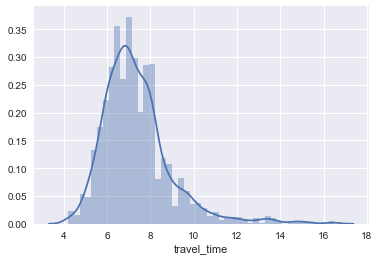

In [188]:
sns.distplot(ID_4377906289869500514_hour8[ID_4377906289869500514_hour8['travel_time']<threshold]['travel_time'])

## 按照t_div_l<0.3清洗数据

In [154]:
ID_4377906289869500514_hour8['t_div_l']=ID_4377906289869500514_hour8['travel_time']/ID_4377906289869500514_hour8['length']

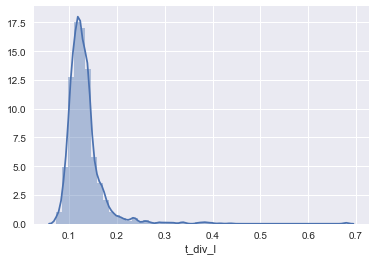

In [156]:
sns.distplot(ID_4377906289869500514_hour8['t_div_l'])

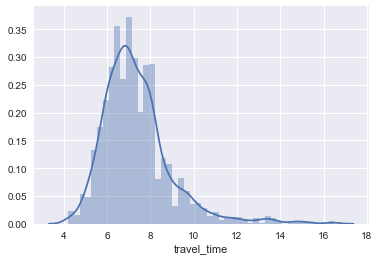

In [189]:
sns.distplot(ID_4377906289869500514_hour8.query("t_div_l<0.3")['travel_time'])

#### 看一下第一条link在8点到9点之间minute与travel_time的相关性

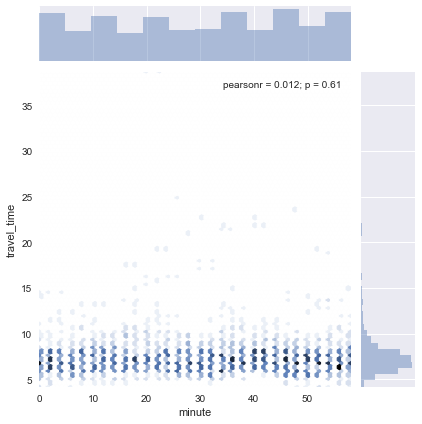

In [165]:
sns.jointplot('minute','travel_time',data=ID_4377906289869500514_hour8,kind='hex')

#### 第一条link在24小时内,时间与travel_time的相关性

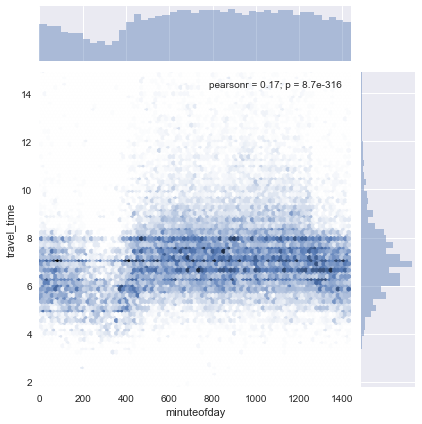

In [173]:
sns.jointplot('minuteofday','travel_time',data=ID_4377906289869500514.query('travel_time<15'),kind='hex')

#### minuteofmonth与travel_time的相关性

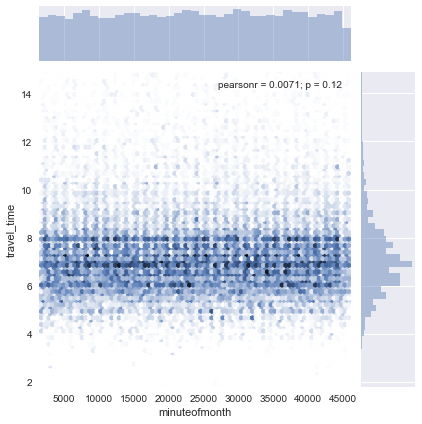

In [197]:
sns.jointplot('minuteofmonth','travel_time',data=ID_4377906289869500514.query('travel_time<15'),kind='hex')

#### minuteofyear与travel_time的相关性

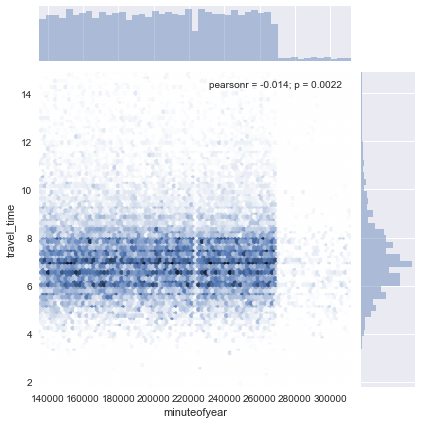

In [200]:
sns.jointplot('minuteofyear','travel_time',data=ID_4377906289869500514.query('travel_time<15'),kind='hex')

#### 按照minuteofyear排序

In [201]:
ID_4377906289869500514 = ID_4377906289869500514.sort_values(by='minuteofyear')

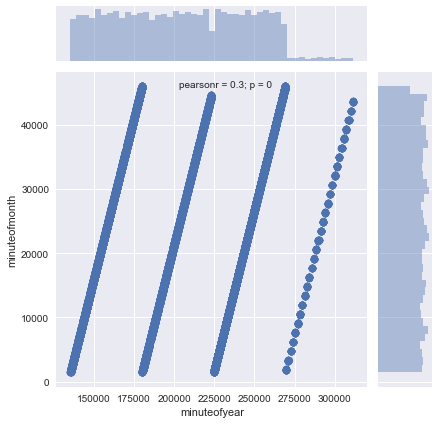

In [206]:
#排序后的情况
sns.jointplot('minuteofyear','minuteofmonth',data=ID_4377906289869500514.query('travel_time<15'))

In [207]:
ID_4377906289869500514.iloc[343:353]

,link_ID,date,time_interval,travel_time,t0,t1,hour,minute,minuteofday,day,month,minuteofmonth,minuteofyear
7433701,4377906289869500514,2016-03-01,"[2016-03-01 20:18:00,2016-03-01 20:20:00)",5.3,2016-03-01 20:18:00,2016-03-01 20:20:00,20,18,1218,1,3,2658,136578
7412647,4377906289869500514,2016-03-01,"[2016-03-01 20:24:00,2016-03-01 20:26:00)",7.0,2016-03-01 20:24:00,2016-03-01 20:26:00,20,24,1224,1,3,2664,136584
7397948,4377906289869500514,2016-03-01,"[2016-03-01 20:26:00,2016-03-01 20:28:00)",7.0,2016-03-01 20:26:00,2016-03-01 20:28:00,20,26,1226,1,3,2666,136586
7427632,4377906289869500514,2016-03-01,"[2016-03-01 20:28:00,2016-03-01 20:30:00)",7.3,2016-03-01 20:28:00,2016-03-01 20:30:00,20,28,1228,1,3,2668,136588
7454323,4377906289869500514,2016-03-01,"[2016-03-01 20:30:00,2016-03-01 20:32:00)",7.3,2016-03-01 20:30:00,2016-03-01 20:32:00,20,30,1230,1,3,2670,136590
7397831,4377906289869500514,2016-03-01,"[2016-03-01 20:32:00,2016-03-01 20:34:00)",7.3,2016-03-01 20:32:00,2016-03-01 20:34:00,20,32,1232,1,3,2672,136592
7404574,4377906289869500514,2016-03-01,"[2016-03-01 20:34:00,2016-03-01 20:36:00)",10.8,2016-03-01 20:34:00,2016-03-01 20:36:00,20,34,1234,1,3,2674,136594
7407334,4377906289869500514,2016-03-01,"[2016-03-01 20:36:00,2016-03-01 20:38:00)",8.0,2016-03-01 20:36:00,2016-03-01 20:38:00,20,36,1236,1,3,2676,136596
7440786,4377906289869500514,2016-03-01,"[2016-03-01 20:38:00,2016-03-01 20:40:00)",6.5,2016-03-01 20:38:00,2016-03-01 20:40:00,20,38,1238,1,3,2678,136598
7432661,4377906289869500514,2016-03-01,"[2016-03-01 20:40:00,2016-03-01 20:42:00)",6.5,2016-03-01 20:40:00,2016-03-01 20:42:00,20,40,1240,1,3,2680,136600


In [214]:
ID_4377906289869500514.iloc[343:3353]

,link_ID,date,time_interval,travel_time,t0,t1,hour,minute,minuteofday,day,month,minuteofmonth,minuteofyear
7433701,4377906289869500514,2016-03-01,"[2016-03-01 20:18:00,2016-03-01 20:20:00)",5.3,2016-03-01 20:18:00,2016-03-01 20:20:00,20,18,1218,1,3,2658,136578
7412647,4377906289869500514,2016-03-01,"[2016-03-01 20:24:00,2016-03-01 20:26:00)",7.0,2016-03-01 20:24:00,2016-03-01 20:26:00,20,24,1224,1,3,2664,136584
7397948,4377906289869500514,2016-03-01,"[2016-03-01 20:26:00,2016-03-01 20:28:00)",7.0,2016-03-01 20:26:00,2016-03-01 20:28:00,20,26,1226,1,3,2666,136586
7427632,4377906289869500514,2016-03-01,"[2016-03-01 20:28:00,2016-03-01 20:30:00)",7.3,2016-03-01 20:28:00,2016-03-01 20:30:00,20,28,1228,1,3,2668,136588
7454323,4377906289869500514,2016-03-01,"[2016-03-01 20:30:00,2016-03-01 20:32:00)",7.3,2016-03-01 20:30:00,2016-03-01 20:32:00,20,30,1230,1,3,2670,136590
7397831,4377906289869500514,2016-03-01,"[2016-03-01 20:32:00,2016-03-01 20:34:00)",7.3,2016-03-01 20:32:00,2016-03-01 20:34:00,20,32,1232,1,3,2672,136592
7404574,4377906289869500514,2016-03-01,"[2016-03-01 20:34:00,2016-03-01 20:36:00)",10.8,2016-03-01 20:34:00,2016-03-01 20:36:00,20,34,1234,1,3,2674,136594
7407334,4377906289869500514,2016-03-01,"[2016-03-01 20:36:00,2016-03-01 20:38:00)",8.0,2016-03-01 20:36:00,2016-03-01 20:38:00,20,36,1236,1,3,2676,136596
7440786,4377906289869500514,2016-03-01,"[2016-03-01 20:38:00,2016-03-01 20:40:00)",6.5,2016-03-01 20:38:00,2016-03-01 20:40:00,20,38,1238,1,3,2678,136598
7432661,4377906289869500514,2016-03-01,"[2016-03-01 20:40:00,2016-03-01 20:42:00)",6.5,2016-03-01 20:40:00,2016-03-01 20:42:00,20,40,1240,1,3,2680,136600


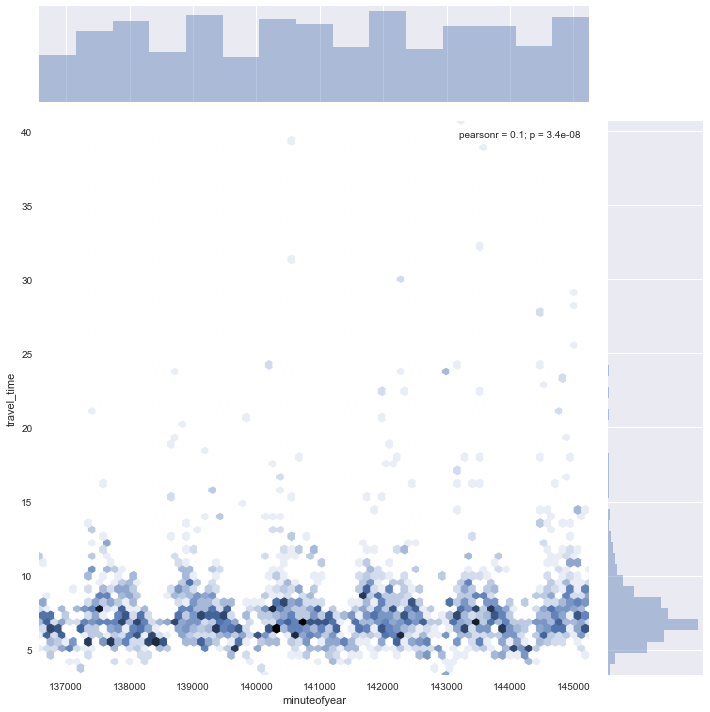

In [213]:
sns.jointplot('minuteofyear','travel_time',data=ID_4377906289869500514.iloc[343:3353],kind='hex', size=10)

### one hot

In [190]:
pd.get_dummies(ID_4377906289869500514['hour'])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
699,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
947,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1069,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1605,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## test zone